# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

In [ ]:
housing_path = "/content/housing_data.csv"
titanic_path = "/content/titanic_data.csv"
classify_path = "/content/classified_data.txt"


# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [ ]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [ ]:
# add code here
housing_df = pd.read_csv(housing_path)

housing_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [ ]:
# add code here

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [ ]:
# add code here
housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [ ]:
# add code here
col_names = list(housing_df.columns)
print("List of col names : ",col_names)
for i in range(len(col_names)):
  print(col_names[i])

List of col names :  ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address']
Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


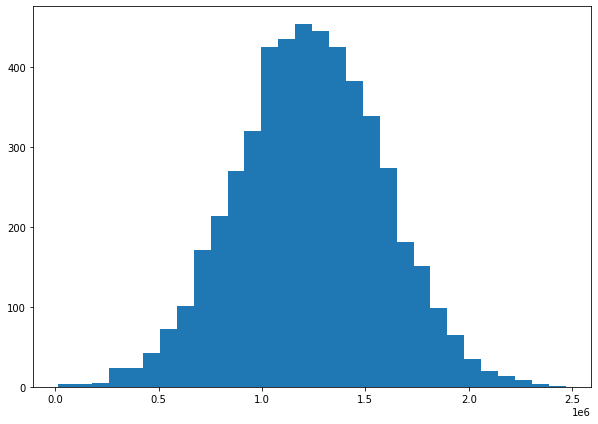

In [ ]:
# add code here
from scipy.stats import norm
import statistics

a = housing_df["Price"]
n_bins = 30
# Creating histogram
print(a)
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a,bins = n_bins)
 
# Show plot
plt.show()



**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [ ]:
# add code here

housing_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [ ]:
# add code here
X = pd.DataFrame(housing_df)
X.drop('Price',axis=1,inplace=True)
X.drop('Address',axis=1,inplace=True)
X
y=housing_df["Price"]
print(type(y))


<class 'pandas.core.series.Series'>


In [ ]:
# This code should print (5000, 5) and (5000,) if everything is correct

print(X.shape,y.shape)

(5000, 5) (5000,)


In [ ]:
# print a few record of X
# add code here

print(X.head(10))

   Avg. Area Income  ...  Area Population
0      79545.458574  ...     23086.800503
1      79248.642455  ...     40173.072174
2      61287.067179  ...     36882.159400
3      63345.240046  ...     34310.242831
4      59982.197226  ...     26354.109472
5      80175.754159  ...     26748.428425
6      64698.463428  ...     60828.249085
7      78394.339278  ...     36516.358972
8      59927.660813  ...     29387.396003
9      81885.927184  ...     40149.965749

[10 rows x 5 columns]


In [ ]:
# print a few record of y
# add code here
print(y.head(10))

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
5    1.068138e+06
6    1.502056e+06
7    1.573937e+06
8    7.988695e+05
9    1.545155e+06
Name: Price, dtype: float64


### Test-train split

**Import train_test_split function from scikit-learn**

In [ ]:
# add code here
from sklearn.model_selection import train_test_split


**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [ ]:
# add code here
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.size, X_test.size, y_train.size, y_test.size)

(3500, 5) (1500, 5) (3500,) (1500,)
17500 7500 3500 1500


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [ ]:
# add code for imports here
from sklearn.linear_model import LinearRegression
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()
  




**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [ ]:
# add code here
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [ ]:
# add code here
predictions = lm.predict(X_test)
predictions.size

1500

**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

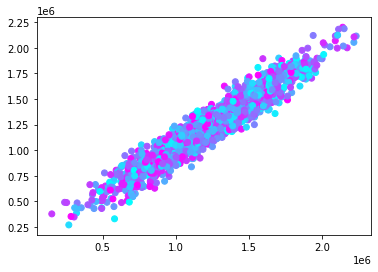

In [ ]:
# add code here

Y = predictions
X = y_test
colors = np.random.randint(1500, size=(1500))
plt.scatter(X, Y, c=colors, cmap='cool')


plt.show() 

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [ ]:
# add code here
from sklearn.metrics import r2_score
res = r2_score(y_test, predictions)
print(round(res,3))

0.917


# 2) K-nearest neighbor Classification

### Import packages and dataset

In [ ]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [ ]:
# add code here

df =  pd.read_csv("classified_data.txt")

### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [ ]:
# add code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [ ]:
# add code here
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [ ]:
# add code here
col_names = list(df.columns)
print("List of col names : ",col_names)
for i in range(len(col_names)):
  print(col_names[i])

List of col names :  ['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ', 'TARGET CLASS']
Unnamed: 0
WTT
PTI
EQW
SBI
LQE
QWG
FDJ
PJF
HQE
NXJ
TARGET CLASS


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

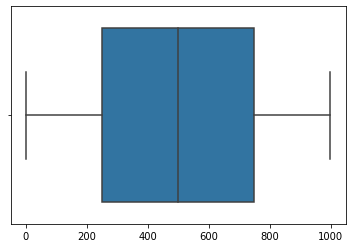

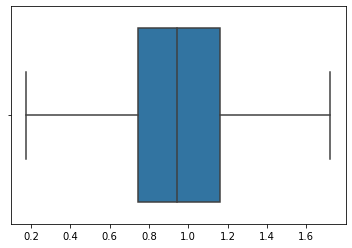

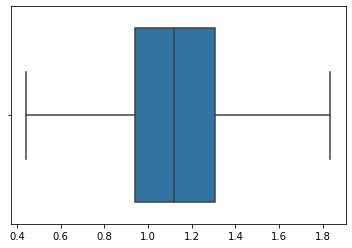

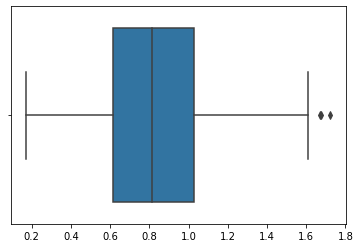

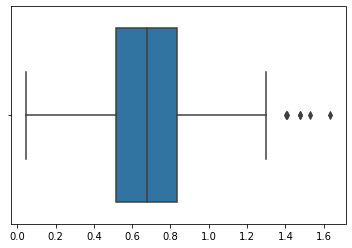

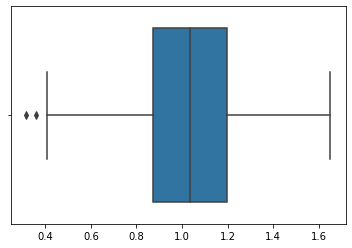

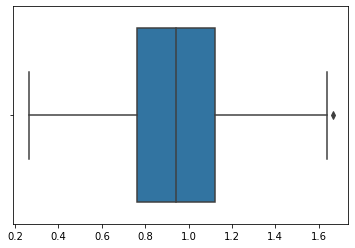

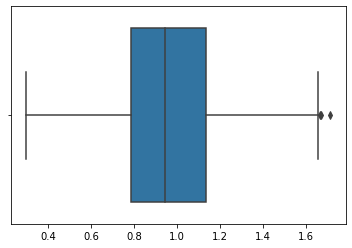

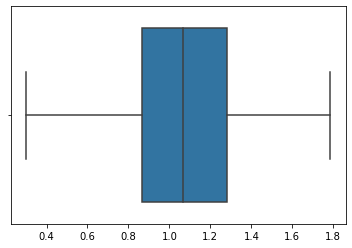

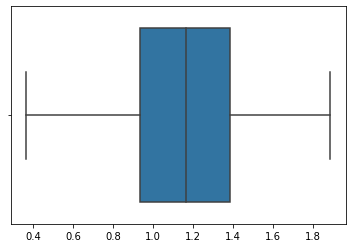

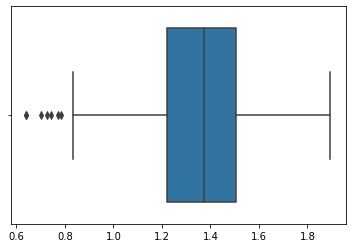

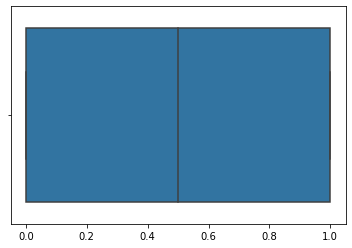

In [ ]:
# add code here

for column in col_names:
    x=df[column].values
    sns.boxplot(x=x, data=df)
    plt.show()


### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# add code here

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [ ]:
# add code here

X = pd.DataFrame(df)
X.drop('TARGET CLASS',axis=1,inplace=True)
col_names = list(X.columns)
print("List of col names : ",col_names)
scaled_data = scaler.fit(X)
scaled_data = scaler.transform(X)

print(scaled_data)

List of col names :  ['Unnamed: 0', 'WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']
[[-1.73031962 -0.12354188  0.18590747 ... -1.48236813 -0.9497194
  -0.64331425]
 [-1.72685552 -1.08483602 -0.43034845 ... -0.20224031 -1.82805088
   0.63675862]
 [-1.72339142 -0.78870217  0.33931821 ...  0.28570652 -0.68249379
  -0.37784986]
 ...
 [ 1.72339142  0.64177714 -0.51308341 ... -2.36249443 -0.81426092
   0.11159651]
 [ 1.72685552  0.46707241 -0.98278576 ... -0.03677699  0.40602453
  -0.85567   ]
 [ 1.73031962 -0.38765353 -0.59589427 ... -0.56778932  0.3369971
   0.01034996]]


**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
# add code here

df_feat = pd.DataFrame(scaled_data,columns = col_names)

df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [ ]:
# add code here

X = df_feat
y = df["TARGET CLASS"]



**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# add code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)



### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [ ]:
# add code here
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
# add code here
pred = model.predict(X_test)
pred.size

300

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# add code here
from sklearn import metrics
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       134
           1       0.92      0.89      0.91       166

    accuracy                           0.90       300
   macro avg       0.89      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
# add code here
print(round(metrics.accuracy_score(y_test,pred),3))


0.897


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
ar_kvalue = [0]*60
ar_neighvalue = [0]*60
for i in range(0,60):
  from sklearn.neighbors import KNeighborsClassifier
  model = KNeighborsClassifier(n_neighbors=i+1)
  model.fit(X_train,y_train)
  pred = model.predict(X_test)
  from sklearn import metrics
  ar_kvalue[i] = metrics.accuracy_score(y_test,pred)
  ar_neighvalue[i]=i+1
  #print( i+1 ,ar_kvalue[i])

# add code here
print(ar_kvalue)
print(ar_neighvalue)

[0.8966666666666666, 0.8733333333333333, 0.9233333333333333, 0.9033333333333333, 0.9166666666666666, 0.92, 0.94, 0.93, 0.9433333333333334, 0.9333333333333333, 0.9433333333333334, 0.9333333333333333, 0.93, 0.93, 0.9333333333333333, 0.9366666666666666, 0.94, 0.94, 0.94, 0.9466666666666667, 0.9433333333333334, 0.9433333333333334, 0.9366666666666666, 0.9366666666666666, 0.9233333333333333, 0.93, 0.9233333333333333, 0.9266666666666666, 0.9233333333333333, 0.93, 0.9166666666666666, 0.92, 0.9166666666666666, 0.9166666666666666, 0.9066666666666666, 0.91, 0.91, 0.91, 0.9133333333333333, 0.91, 0.91, 0.91, 0.91, 0.9166666666666666, 0.9133333333333333, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.92, 0.9166666666666666, 0.9166666666666666, 0.9133333333333333, 0.9133333333333333, 0.9166666666666666, 0.9133333333333333, 0.9166666666666666, 0.92, 0.9233333333333333, 0.9166666666666666, 0.9266666666666666]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,

**Plot a graph of K value vs Accuracy**

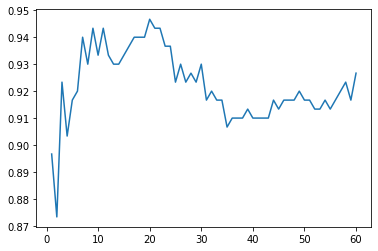

In [ ]:
# add code here
kval = ar_kvalue
neighval = ar_neighvalue

plt.plot( neighval , kval)
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [ ]:
# add code here 
import numpy as np

karr = np.array(ar_kvalue)
max = np.argmax(karr)

In [ ]:
print("Accuracy is highest at K value " ,max , "and its value is ",ar_kvalue[max])

Accuracy is highest at K value  19 and its value is  0.9466666666666667


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [ ]:
#write code here

train_df = pd.read_csv("titanic_data.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df["Name"]
train_df["Title"]=''
for i in range(len(train_df)):
  title_search = train_df["Name"][i]
  title = str(title_search).split(",")
  finaltitle = title[1].split(".")
  train_df["Title"][i]=finaltitle[0]


  #remove nan values
nan_values = train_df.isna()
more = nan_values.mean().round(5)*100
print(more)
for i in range(len(more)):
  if(more[i] >= 50):
    remove = train_df.columns[i]
    
train_df.drop(remove, inplace=True, axis=1)


  ##filling nans
embark_col = train_df["Embarked"]
for i in range(len(embark_col)):
  if train_df["Embarked"].isnull().any():
    train_df["Embarked"]=train_df["Embarked"].fillna(train_df["Embarked"].mode()[0])
for i in range(len(train_df)):
  if train_df["Age"].isnull().any():
    train_df["Age"]=train_df["Age"].fillna(train_df["Age"].mean())

  ##merging family_mebers
train_df["Family_members"]=train_df["SibSp"]+train_df["Parch"]
train_df.drop("SibSp", inplace=True, axis=1)
train_df.drop("Parch", inplace=True, axis=1)
train_df.drop("Name", inplace=True, axis=1)
train_df.drop("Ticket", inplace=True, axis=1)
train_df.drop("PassengerId" , inplace = True ,axis=1)

  ##Nomralizing
def normalize(data_list):
  X_new = []
  X_max = data_list[0]
  for i in range(1, len(data_list)):
        if data_list[i] > X_max:
            X_max = data_list[i]
  

  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new

train_df["Age"] = normalize(train_df["Age"])
train_df["Fare"] = normalize(train_df["Fare"])
train_df["Family_members"] = normalize(train_df["Family_members"])
  
train_df = pd.get_dummies(train_df, columns=["Pclass", "Sex", "Title", "Embarked"])
train_df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


PassengerId     0.000
Survived        0.000
Pclass          0.000
Name            0.000
Sex             0.000
Age            19.865
SibSp           0.000
Parch           0.000
Ticket          0.000
Fare            0.000
Cabin          77.104
Embarked        0.224
Title           0.000
dtype: float64


,Survived,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_ Capt,Title_ Col,Title_ Don,Title_ Dr,Title_ Jonkheer,Title_ Lady,Title_ Major,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
887,1,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [ ]:
#write code here

titanic_df = pd.DataFrame(train_df)
y = titanic_df["Survived"]

<b>remove the y_label (survived) from the dataframe</b>

In [ ]:
#write code here

titanic_df.drop("Survived", inplace=True, axis=1)
X = titanic_df
X

,Age,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_ Capt,Title_ Col,Title_ Don,Title_ Dr,Title_ Jonkheer,Title_ Lady,Title_ Major,Title_ Master,Title_ Miss,Title_ Mlle,Title_ Mme,Title_ Mr,Title_ Mrs,Title_ Ms,Title_ Rev,Title_ Sir,Title_ the Countess,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0.472229,0.139136,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0.321438,0.015469,0.0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0.434531,0.103644,0.1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0.434531,0.015713,0.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
887,0.233476,0.058556,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
888,0.367921,0.045771,0.3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
889,0.321438,0.058556,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [ ]:
#write code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30)


<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [ ]:
#write code here
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True)
test_acc=[]
train_acc=[]
model = RandomForestClassifier(n_estimators=20, max_depth=5)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    test_acc.append(model.score(X_test, y_test))
    train_acc.append(model.score(X_train, y_train))

test_max = test_acc[0]
for i in range(1, len(test_acc)):
      if test_acc[i] > test_max:
          test_max = test_acc[i]

test_max

0.8876404494382022

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
print('test accuracy: ', test_max)
print('train accuracy:', train_acc[test_acc.index(test_max)])



test accuracy:  0.8876404494382022
train accuracy: 0.8416458852867831
